In [50]:

import numpy as np
import pandas as pd
import yfinance as yf
from keras.models import load_model
import streamlit as st
import matplotlib.pyplot as plt

In [52]:
model = load_model("C:\Users\91881\OneDrive\Desktop\Stock_Market_Prediction_ML.Kera")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\91881\AppData\Local\Temp\ipykernel_9720\4090199014.py:1: SyntaxWarning: invalid escape sequence '\A'
  model = load_model("C:\AAPL.csv")
C:\Users\91881\AppData\Local\Temp\ipykernel_9720\4090199014.py:1: SyntaxWarning: invalid escape sequence '\A'
  model = load_model("C:\AAPL.csv")


ValueError: File format not supported: filepath=C:\AAPL.csv. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(C:\AAPL.csv, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [49]:
st.header('Stock Market Predictor')



DeltaGenerator()

In [26]:
stock =st.text_input('Enter Stock Symnbol', 'GOOG')
start = '2012-01-01'
end = '2022-12-31'

In [27]:
data = yf.download(stock, start ,end)

[*********************100%%**********************]  1 of 1 completed


In [28]:
st.subheader('Stock Data')
st.write(data)

In [29]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
pas_100_days = data_train.tail(100)
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale = scaler.fit_transform(data_test)

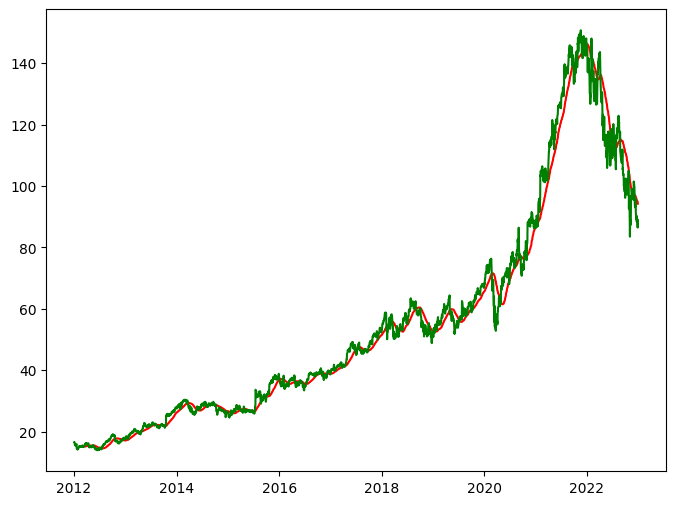

DeltaGenerator()

In [33]:
st.subheader('Price vs MA50')
ma_50_days = data.Close.rolling(50).mean()
fig1 = plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'r')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig1)

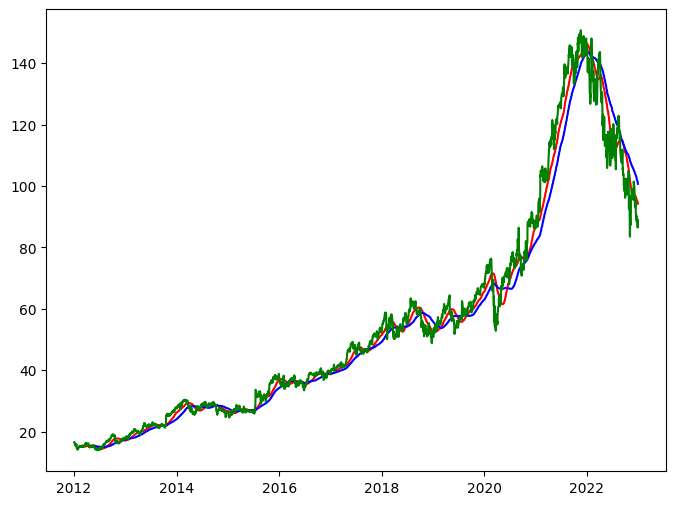

DeltaGenerator()

In [34]:
st.subheader('Price vs MA50 vs MA100')
ma_100_days = data.Close.rolling(100).mean()
fig2 = plt.figure(figsize=(8,6))
plt.plot(ma_50_days, 'r')
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig2)

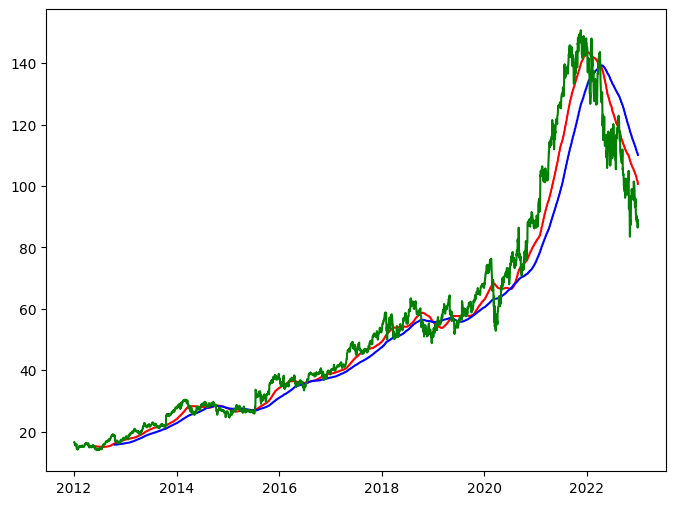

DeltaGenerator()

In [35]:
st.subheader('Price vs MA100 vs MA200')
ma_200_days = data.Close.rolling(200).mean()
fig3 = plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()
st.pyplot(fig3)

In [36]:
x = []
y = []

In [37]:
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [38]:
x,y = np.array(x), np.array(y)

In [39]:
predict = model.predict(x)

NameError: name 'model' is not defined